In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker 
import seaborn as sns
pd.set_option('display.max_columns',None)
import pickle
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score,confusion_matrix,ConfusionMatrixDisplay,classification_report,roc_auc_score,roc_curve
from sklearn.tree import plot_tree
from xgboost import XGBClassifier,XGBRegressor,plot_importance

#Project on Employee Retention Rate

In [5]:
ch=pd.read_csv(r"HR_comma_sep.csv")

In [6]:
ch.keys()

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [7]:
ch.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [9]:
ch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [11]:
ch=ch.rename(columns={'average_montly_hours':'Average_Monthly_Hours','Work_accident':'Work_Accident','time_spend_company':'Tenure','Department':'Department'})

In [12]:
ch

,satisfaction_level,last_evaluation,number_project,Average_Monthly_Hours,Tenure,Work_Accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [13]:
ch.keys()

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'Average_Monthly_Hours', 'Tenure', 'Work_Accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [14]:
df_duplicates=ch[ch.duplicated()==True]
df_duplicates['left'].value_counts()

left
1    1580
0    1428
Name: count, dtype: int64

In [15]:
df1=ch.drop_duplicates(keep='first')
df1

,satisfaction_level,last_evaluation,number_project,Average_Monthly_Hours,Tenure,Work_Accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,management,high
11996,0.74,0.95,5,266,10,0,0,1,management,high
11997,0.85,0.54,3,185,10,0,0,1,management,high
11998,0.33,0.65,3,172,10,0,0,1,marketing,high


In [16]:
df1.shape

(11991, 10)

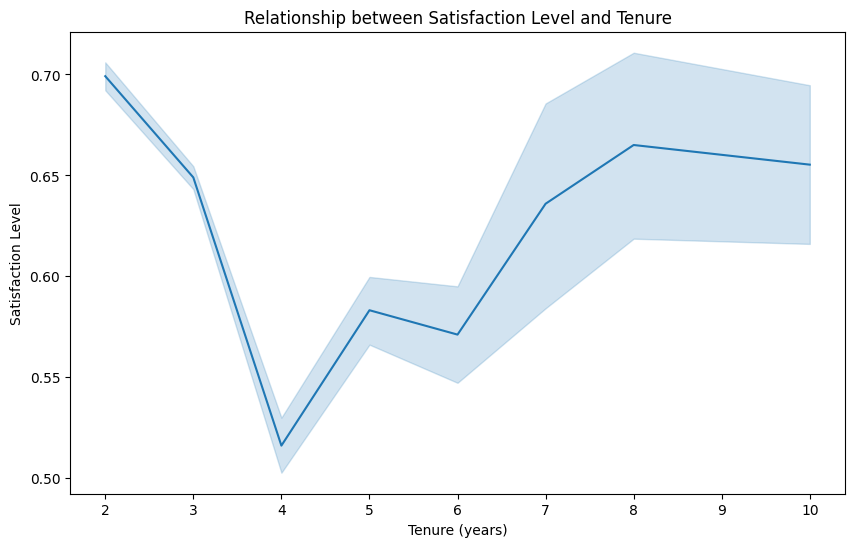

In [17]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df1, x='Tenure', y='satisfaction_level')

plt.xlabel('Tenure (years)')
plt.ylabel('Satisfaction Level')
plt.title('Relationship between Satisfaction Level and Tenure')

plt.show()


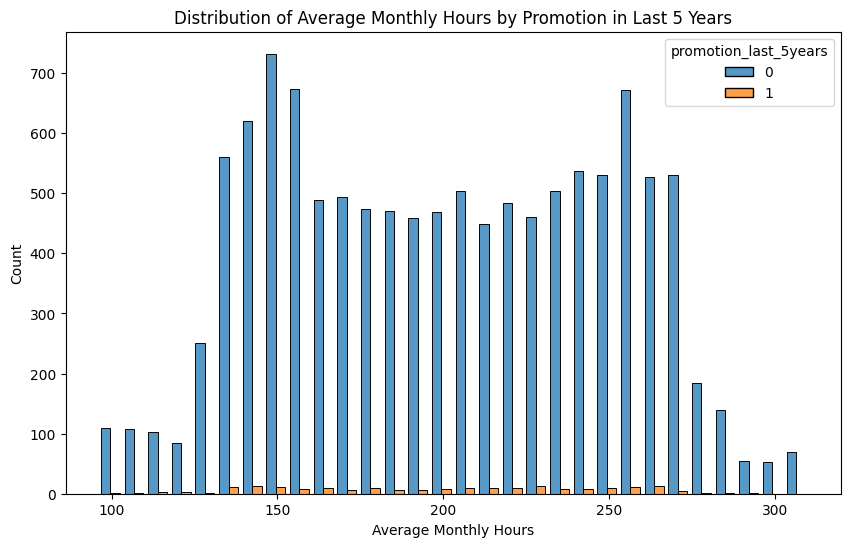

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df1, x='Average_Monthly_Hours', hue='promotion_last_5years', 
             multiple='dodge', bins=30, shrink=0.8)
plt.xlabel('Average Monthly Hours')
plt.ylabel('Count')
plt.title('Distribution of Average Monthly Hours by Promotion in Last 5 Years')
plt.show()

In [19]:
features=['satisfaction_level',
       'Average_Monthly_Hours', 'Tenure',
       'promotion_last_5years', 'Department', 'salary']
target='left'

In [20]:
x=df1[features]
y=df1[target]

In [21]:
ch_encoded = pd.get_dummies(df1, columns=['Department', 'salary'], drop_first=True)
features = ['satisfaction_level', 'Average_Monthly_Hours', 'Tenure', 
            'promotion_last_5years', 'Work_Accident'] + [col for col in ch_encoded.columns if 'Department_' in col or 'salary_' in col]
x = ch_encoded[features]
scaler = StandardScaler()
x[['satisfaction_level', 'Average_Monthly_Hours','Work_Accident','promotion_last_5years']] = scaler.fit_transform(x[['satisfaction_level','Average_Monthly_Hours','Work_Accident','promotion_last_5years']])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC Score: {roc_auc:.2f}")






Accuracy: 0.84
Precision: 0.53
Recall: 0.22
F1 Score: 0.31
ROC AUC Score: 0.82


C:\Users\DEV GARG\AppData\Local\Temp\ipykernel_11752\1478739427.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[['satisfaction_level', 'Average_Monthly_Hours','Work_Accident','promotion_last_5years']] = scaler.fit_transform(x[['satisfaction_level','Average_Monthly_Hours','Work_Accident','promotion_last_5years']])


In [22]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1998
           1       0.53      0.22      0.31       401

    accuracy                           0.84      2399
   macro avg       0.69      0.59      0.61      2399
weighted avg       0.80      0.84      0.81      2399



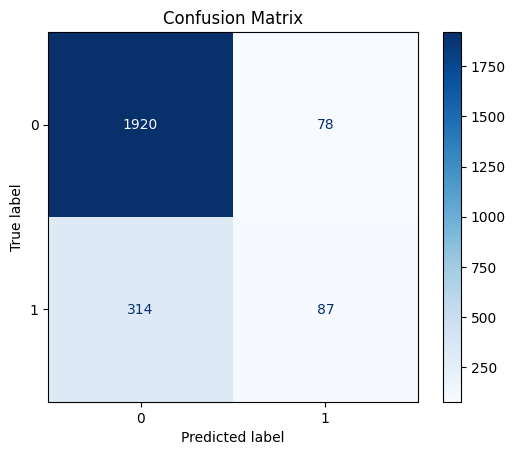

In [23]:
# 6. Confusion matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

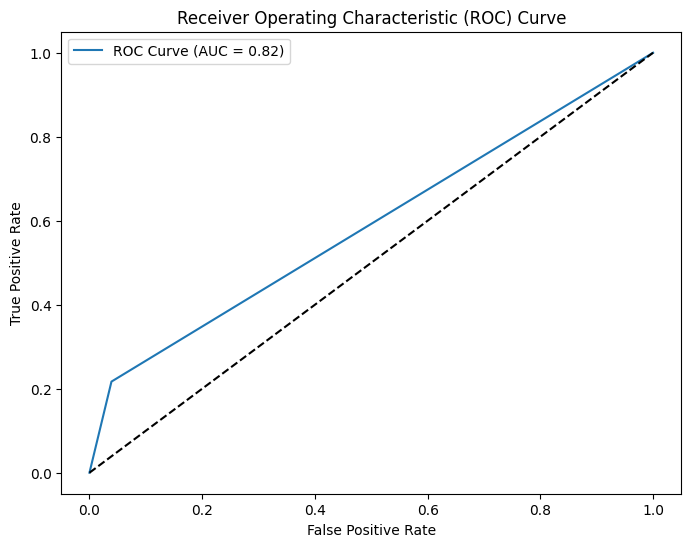

In [24]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random chance
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='best')
plt.show()

XGBoost Accuracy: 0.97
Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1998
           1       0.93      0.89      0.91       401

    accuracy                           0.97      2399
   macro avg       0.95      0.94      0.95      2399
weighted avg       0.97      0.97      0.97      2399



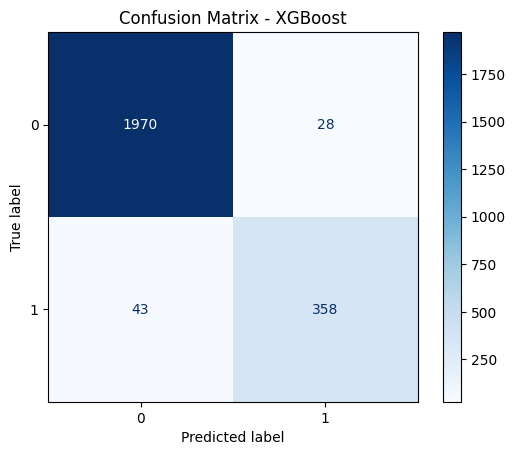

In [25]:
# XGBoost
xgb_clf = XGBClassifier(random_state=42)
xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)
print(f"XGBoost Accuracy: {accuracy_score(y_test, y_pred_xgb):.2f}")

print("Classification Report for XGBoost:")
print(classification_report(y_test, y_pred_xgb))

cm_xgb = confusion_matrix(y_test, y_pred_xgb)

ConfusionMatrixDisplay(cm_xgb).plot(cmap='Blues')
plt.title('Confusion Matrix - XGBoost')
plt.show()